In [61]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from mat2list import EEG

import mne

In [2]:
data = scipy.io.loadmat("restingstate64chans.mat")
eeg = EEG(data)

In [26]:
eeg.eegdatadata

(64, 2048, 63)

In [34]:
chanpowr = (2*np.abs(scipy.fft.fft(eeg.eegdata, axis=1)/ eeg.pnts))**2

chanpowr = np.mean(chanpowr,2)

hz = np.linspace(0, eeg.srate/2, int((eeg.pnts/2)+1))

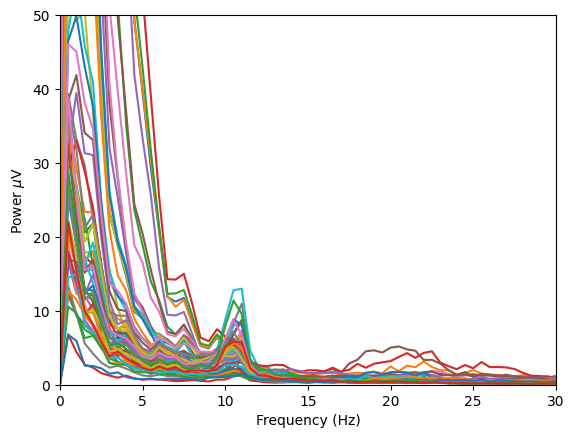

In [39]:
plt.plot(hz, chanpowr[:,:len(hz)].T)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power $\mu$V")
plt.xlim([0,30])
plt.ylim([0,50])
plt.show()

In [43]:

alphabounds = [8,12]

lowidx = int(np.argmin(np.abs(hz-alphabounds[0])))
highidx = int(np.argmin(np.abs(hz-alphabounds[1])))
freqidx = [lowidx, highidx]
freqidx

[16, 24]

In [52]:
alphapower = np.mean(chanpowr[:,freqidx[0]:freqidx[1]], 1)

In [79]:
def topoplot(eegclass,alphapower):
    head_rad = 0.095
    plot_rad = 0.51
    squeezefac = head_rad / plot_rad

    eeg_chanlocs = []
    for i in range (eegclass.chanlocs[1]):
        th = eegclass.theta[i]
        rd = eegclass.radius[i]
        theta_rad = np.deg2rad(th)

        x = rd * np.cos(theta_rad)
        y = rd * np.sin(theta_rad)
        eeg_chanlocs.append([y*squeezefac , x*squeezefac])

    eeg_chanlocs = np.array(eeg_chanlocs)

    fig,ax = plt.subplots(figsize=(8,8))
    im, _ = mne.viz.plot_topomap(alphapower, eeg_chanlocs,ch_type="eeg",
                        axes=ax, cmap="RdBu_r", contours=0, vlim=(eegclass.xmin*3,eegclass.xmax*4)
                        )
    plt.show()

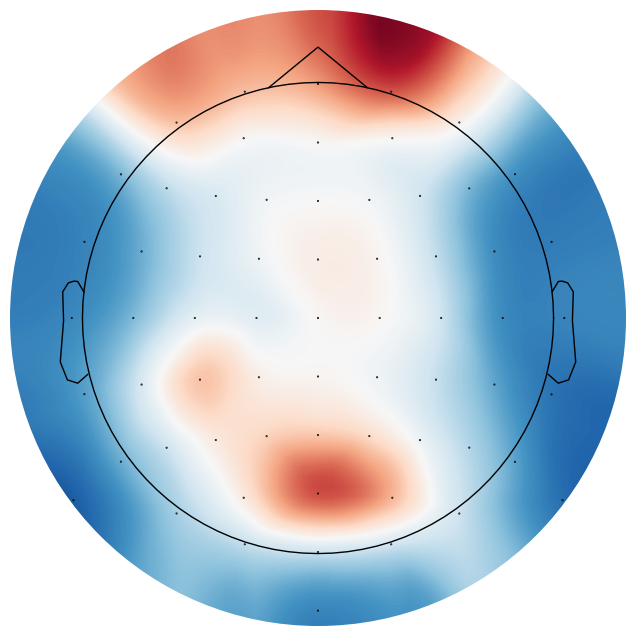

In [80]:
topoplot(eeg, alphapower)